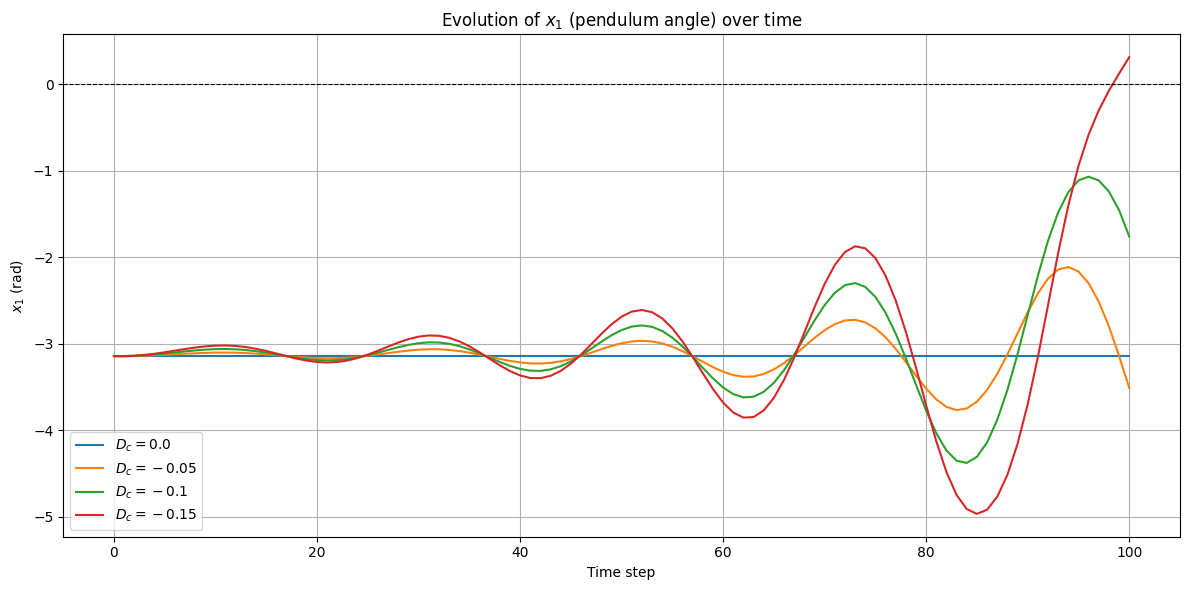

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# System parameters
delta = 0.1     # time step
g = 9.81        # gravity
mu = 0.05       # damping coefficient
m = 1.0         # mass
l = 1.0         # length

# Simulation settings
T = 100  # simulation time steps
x0 = np.array([-np.pi, 0.0])  # initial state (hanging down)

# Controller gains to test
D_c_values = [0.0, -0.05, -0.1, -0.15]

# Storage for trajectories
trajectories = {}

# Dynamics function
def step(x, D_c):
    x1, x2 = x
    u = D_c * x1
    x1_next = x1 + delta * x2
    nonlinear_term = - (g * delta / l) * (x1 - np.sin(x1))
    x2_next = ((1 - (delta * mu) / (m * l**2)) * x2 +
               (g * delta / l) * x1 +
               nonlinear_term +
               (delta / (m * l**2)) * u)
    return np.array([x1_next, x2_next])

# Run simulations
for D_c in D_c_values:
    x = x0.copy()
    trajectory = [x.copy()]
    for _ in range(T):
        x = step(x, D_c)
        trajectory.append(x.copy())
    trajectories[D_c] = np.array(trajectory)

# Plot results
plt.figure(figsize=(12, 6))
for D_c, traj in trajectories.items():
    plt.plot(traj[:, 0], label=f"$D_c = {D_c}$")
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
plt.title("Evolution of $x_1$ (pendulum angle) over time")
plt.xlabel("Time step")
plt.ylabel("$x_1$ (rad)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


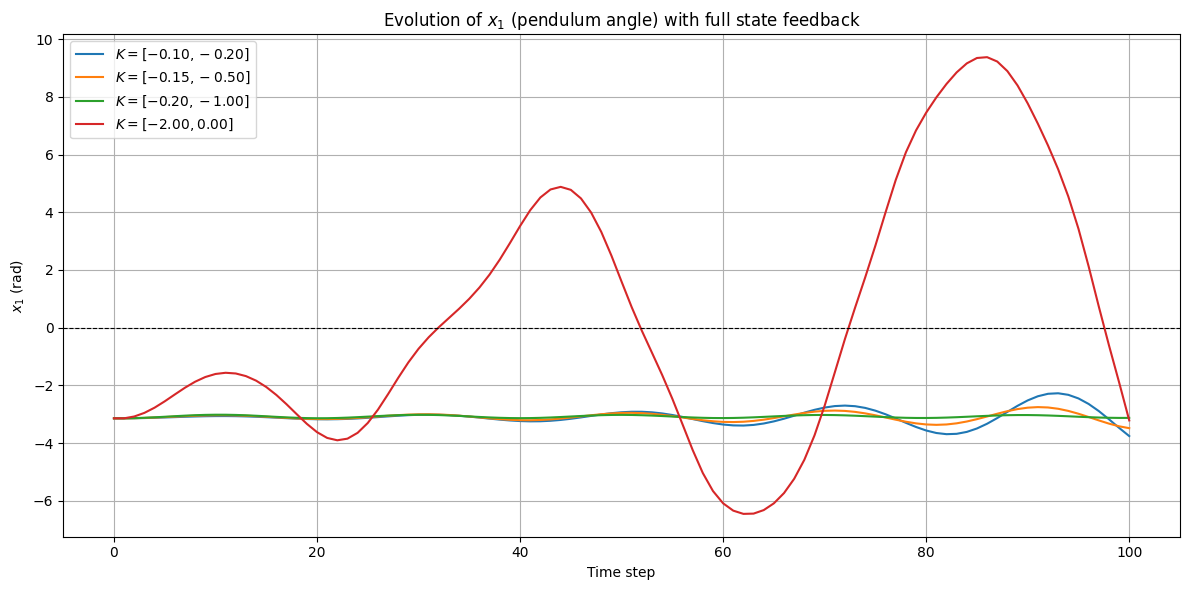

In [14]:
# Full state feedback gains to test
K_values = [np.array([k1, k2]) for k1, k2 in [(-0.1, -0.2), (-0.15, -0.5), (-0.2, -1.0), (-2,0)]]

# Storage for trajectories
full_state_trajectories = {}

# Dynamics with full state feedback
def step_full_state(x, K):
    u = K @ x
    x1, x2 = x
    x1_next = x1 + delta * x2
    nonlinear_term = - (g * delta / l) * (x1 - np.sin(x1))
    x2_next = ((1 - (delta * mu) / (m * l**2)) * x2 +
               (g * delta / l) * x1 +
               nonlinear_term +
               (delta / (m * l**2)) * u)
    return np.array([x1_next, x2_next])

# Run simulations
for K in K_values:
    x = x0.copy()
    trajectory = [x.copy()]
    for _ in range(T):
        x = step_full_state(x, K)
        trajectory.append(x.copy())
    full_state_trajectories[tuple(K)] = np.array(trajectory)

# Plot results for x1
plt.figure(figsize=(12, 6))
for K, traj in full_state_trajectories.items():
    label = f"$K = [{K[0]:.2f}, {K[1]:.2f}]$"
    plt.plot(traj[:, 0], label=label)
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
plt.title("Evolution of $x_1$ (pendulum angle) with full state feedback")
plt.xlabel("Time step")
plt.ylabel("$x_1$ (rad)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
